## Analysing the rhotics of Nordestino and Paulistano

This notebook will make an acoustic analysis of the rhotics /r/, using statistical methods. Mainly, the duration and distance between formants ($F_3$ and $F_4$, and $F_5$ to $F_5$) to, maybe, find signifficant differences between those accents. Also, note that the analysis here is performed using only references from literature in linguistics **ADD CITATIONS**, and it was not supervised by any specialist in the field. Therefore, it a more superficial analysis, but the intent is to provide a more inclusive data, with accents from several brazilian cultures.

In [1]:
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

sns.set_theme(
    style="ticks",
    palette="deep",
    rc={
        "ytick.labelsize": 17,
        "xtick.labelsize": 17,
        "figure.figsize": (8, 4)
    },
)

In [2]:
DATAPATH = pathlib.PosixPath("~/Dev/datasets/ttbacc/ttbacc-rhotics-acoustics.csv").expanduser()
rhotics = pd.read_csv(DATAPATH)
rhotics

length        f4f3        f5f4 phoneme state gender  age  \
0           70  1395.29300   694.39087       ɾ    BA      M  NaN   
1           40   872.74023  1554.44090       ɾ    BA      M  NaN   
2           30   179.87940  1456.26220       ɾ    BA      M  NaN   
3          100  1310.78320   512.56350       ɾ    BA      M  NaN   
4           80  1311.50490   694.05176       ɾ    BA      M  NaN   
...        ...         ...         ...     ...   ...    ...  ...   
196288      40  1068.42090   932.31396       ɾ    PR      F  NaN   
196289      30   798.21313   960.02637       ɾ    PR      F  NaN   
196290      10  1272.98560   580.23240       ɾ    PR      F  NaN   
196291      30  1000.81885   348.03320       ʁ    PR      F  NaN   
196292      50   691.02760  1051.66310       ɾ    PR      F  NaN   

                    speaker caption  
0       wilson brandão lima    a.pt  
1       wilson brandão lima    a.pt  
2       wilson brandão lima    a.pt  
3       wilson brandão lima    a.pt  
4       wilson brandão lima    a.pt  
...                     ...     ...  
196288        isabela bonet    a.pt  
196289        isabela bonet    a.pt  
196290        isabela bonet    a.pt  
196291        isabela bonet    a.pt  
196292        isabela bonet    a.pt  

[196293 rows x 9 columns]

Let clear the data from possible NaN values in our features

In [3]:
rhotics_noage = rhotics.drop("age", axis=1)  # ignore age since there are many NaN values which just means it was not available
nanidx = rhotics_noage.isna().any(axis=1)
rhotics_clean = rhotics[nanidx == False]
print(f"{len(rhotics) - len(rhotics_clean.index)} NaN values")

99 NaN values


There was 99 rows with NaN values in our features, and they were removed. Now, the data is not labelled by accents, so it is necessary to group regions that belong to the desired accents (*Nordestino* and *Paulistano*)

In [4]:
states = ["AL", "PE", "PB", "RN", "CE", "SP"]  # regions that belong to nordestino and sao paulo
rhotics_accents = rhotics_clean[rhotics_clean["state"].isin(states)]
rhotics = rhotics_accents.replace(["AL", "PE", "PB", "RN", "CE"], "NRD")
rhotics

length        f4f3       f5f4 phoneme state gender   age  \
2058        70   625.30520   894.9341       ɾ    SP      F   NaN   
2061        40   850.31570  1000.1106       ɾ    SP      F   NaN   
2064        40  1304.32420   569.2202       ɾ    SP      F   NaN   
2066        60   864.88354  1589.2529       ɾ    SP      F   NaN   
2069        40  1203.67330   803.0183       ɾ    SP      F   NaN   
...        ...         ...        ...     ...   ...    ...   ...   
195740      40  1295.08810   362.0110       ɾ    SP      F  44.0   
195741      30  1095.56790  1637.3364       ɾ    SP      F  44.0   
195742      50  1238.98950   478.3130       ɾ    SP      F  44.0   
195743      50  1045.95630  1244.3813       ɾ    SP      F  44.0   
195744      50   695.90770  1125.0269       ɾ    SP      F  44.0   

                   speaker caption  
2058    silmara r. casadei    a.pt  
2061    silmara r. casadei    a.pt  
2064    silmara r. casadei    a.pt  
2066    silmara r. casadei    a.pt  
2069    silmara r. casadei    a.pt  
...                    ...     ...  
195740   ana paula camargo    a.pt  
195741   ana paula camargo    a.pt  
195742   ana paula camargo    a.pt  
195743   ana paula camargo    a.pt  
195744   ana paula camargo    a.pt  

[74473 rows x 9 columns]

Now, lets group the data and describe its values

In [5]:
rhotics.groupby(["state", "phoneme"]).describe()

length                                                         \
                 count       mean        std   min   25%   50%    75%     max   
state phoneme                                                                   
NRD   ɾ         6908.0  61.608280  61.734628  10.0  30.0  50.0   60.0   680.0   
      ʁ          475.0  85.141053  48.070218  10.0  50.0  80.0  100.0   380.0   
SP    ɾ        62274.0  55.328307  47.898666   9.0  30.0  50.0   60.0  5330.0   
      ʁ         4816.0  83.030523  43.669376  10.0  50.0  80.0  100.0   480.0   

                  f4f3               ...        f5f4                 age  \
                 count         mean  ...         75%        max    count   
state phoneme                        ...                                   
NRD   ɾ         6908.0  1057.649996  ...  1288.46690  3672.1920   2713.0   
      ʁ          475.0  1025.692972  ...  1216.40110  2390.1252    187.0   
SP    ɾ        62274.0  1013.021551  ...  1319.35635  4115.9520  30995.0   
      ʁ         4816.0  1014.327896  ...  1197.66435  3722.7195   2290.0   

                                                                   
                    mean        std   min   25%   50%   75%   max  
state phoneme                                                      
NRD   ɾ        35.142278   8.935880  22.0  30.0  33.0  36.0  58.0  
      ʁ        35.770053  10.320955  22.0  30.0  33.0  36.0  58.0  
SP    ɾ        35.694596  13.718307  14.0  26.0  35.0  45.0  80.0  
      ʁ        35.713537  13.540582  14.0  26.0  34.0  45.0  80.0  

[4 rows x 32 columns]

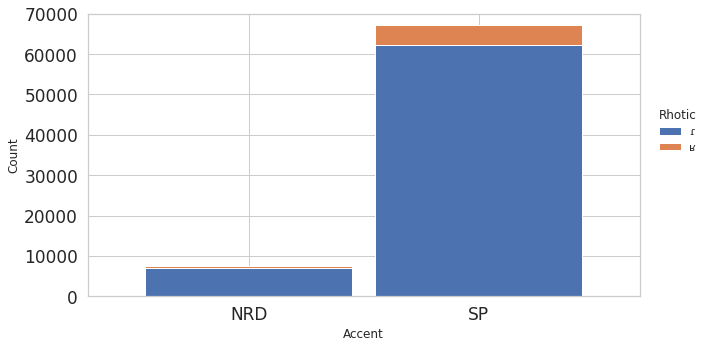

In [6]:
rhotics_count = rhotics.groupby(["state", "phoneme"]).size().reset_index().pivot(columns="phoneme", index="state", values=0)
with sns.axes_style("whitegrid"):
    rhotics_count.plot(
        kind="bar",
        stacked=True,
        figsize=(10, 5),
        xlabel="Accent",
        ylabel="Count",
        rot=0,
        width=0.9,
        ylim=(0, 70000),
    )
    plt.legend(title="Rhotic", bbox_to_anchor=(1.12, .7), frameon=False)
    plt.tight_layout()
    plt.savefig("../imgs/rhotics-count.pdf", dpi=300, transparent=True)

The standard deviations for the lower r seems to be too big, in fact for nordestino it is higher than the mean. So, the data distribution must be skewd

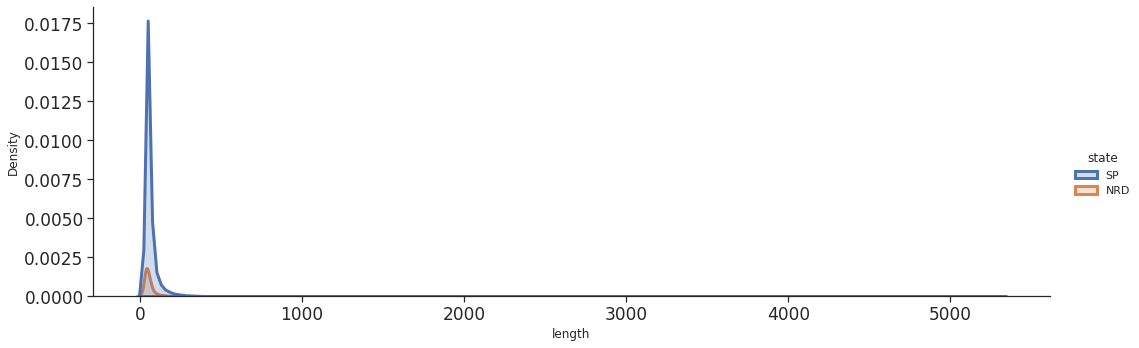

In [7]:
sns.displot(
    data=rhotics,
    x ="length",
    hue="state",
    kind="kde",
    fill=True,
    lw=3,
    aspect=3,
)

As expected, the data is highly skwed to the left, with quite some outliers. A boxplot should highlight the outliers

<AxesSubplot:xlabel='length'>

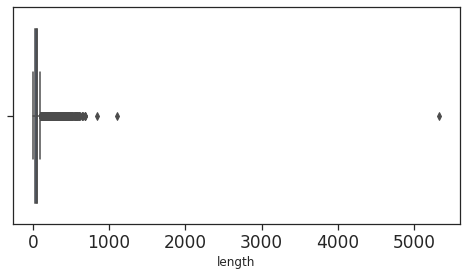

In [8]:
sns.boxplot(
    data=rhotics,
    x="length",
    hue="state",
)

There is a large number of outliers, maybe filtering the data to a reasonable age interval can reduce it

In [9]:
rhotics = rhotics[(rhotics.age <= 30) & (rhotics.age >= 20)]
rhotics

length        f4f3        f5f4 phoneme state gender   age  \
8345        50   872.50024  1490.06320       ɾ    SP      F  27.0   
8349        40   750.60767  1406.93750       ʁ    SP      F  27.0   
8353        40   805.64453  1039.91140       ɾ    SP      F  27.0   
8357        10  1272.37280  1149.49120       ɾ    SP      F  27.0   
8362        40  1246.75170   455.32104       ɾ    SP      F  27.0   
...        ...         ...         ...     ...   ...    ...   ...   
167554      80   866.51000   812.73975       ɾ   NRD      M  30.0   
167556      80  1010.33080   875.29540       ɾ   NRD      M  30.0   
167558      30  1617.35740  1205.52050       ɾ   NRD      M  30.0   
167560      50  1024.14060   379.68042       ɾ   NRD      M  30.0   
167562      50   516.23240  1951.11570       ɾ   NRD      M  30.0   

                speaker caption  
8345       lela brandão    a.pt  
8349       lela brandão    a.pt  
8353       lela brandão    a.pt  
8357       lela brandão    a.pt  
8362       lela brandão    a.pt  
...                 ...     ...  
167554  renan hannouche    a.pt  
167556  renan hannouche    a.pt  
167558  renan hannouche    a.pt  
167560  renan hannouche    a.pt  
167562  renan hannouche    a.pt  

[8998 rows x 9 columns]

Check the data again

In [10]:
rhotics.groupby(["state", "phoneme"]).describe()

length                                                         \
                count        mean        std   min   25%   50%    75%    max   
state phoneme                                                                  
NRD   ɾ        1058.0   61.149338  60.216311  10.0  30.0  40.0   60.0  680.0   
      ʁ          73.0  107.109589  56.336184  30.0  70.0  99.0  140.0  380.0   
SP    ɾ        7293.0   52.968874  37.402031   9.0  30.0  40.0   60.0  490.0   
      ʁ         574.0   73.688153  36.521413  30.0  40.0  70.0  100.0  240.0   

                 f4f3               ...        f5f4                age  \
                count         mean  ...         75%        max   count   
state phoneme                       ...                                  
NRD   ɾ        1058.0   985.101169  ...  1449.99550  3554.9272  1058.0   
      ʁ          73.0   981.968298  ...  1184.15060  2098.3330    73.0   
SP    ɾ        7293.0  1032.143476  ...  1257.68970  3935.2498  7293.0   
      ʁ         574.0   991.557722  ...  1211.73905  3027.1790   574.0   

                                                                  
                    mean       std   min   25%   50%   75%   max  
state phoneme                                                     
NRD   ɾ        28.054820  2.690046  22.0  28.0  28.0  30.0  30.0  
      ʁ        27.753425  2.727335  22.0  28.0  28.0  30.0  30.0  
SP    ɾ        25.451803  3.448475  20.0  23.0  26.0  29.0  30.0  
      ʁ        25.536585  3.295968  20.0  23.0  26.0  29.0  30.0  

[4 rows x 32 columns]

In [11]:
rhotics_count = rhotics.groupby(["state", "phoneme"]).size().reset_index().pivot(columns="phoneme", index="state", values=0)
with sns.axes_style("whitegrid"):
    rhotics_count.plot(
        kind="barh",
        stacked=True,
        figsize=(10, 3),
        xlabel="Accent",
        ylabel="Count",
        rot=0,
        width=0.7,
    )
    plt.legend(title="Rhotic", bbox_to_anchor=(1.12, .7), frameon=False)
    plt.tight_layout()
    plt.savefig("../imgs/rhotics-count.pdf", dpi=300, transparent=False)

Standard deviations seems better, lets check our distributions

In [12]:
sns.displot(
    data=rhotics,
    x ="length",
    hue="state",
    kind="kde",
    fill=True,
    lw=3,
    aspect=3,
)

Still skewed; however, much better.

In [13]:
sns.boxplot(
    data=rhotics,
    x="length",
    hue="state",
)
plt.savefig("../imgs/rhotics-len.pdf", dpi=300)

There seem to have a ton of outliers above 100 ms, lets count them and remove

In [14]:
(rhotics.length > 100).sum()

640

In [15]:
rhotics_len_cut = rhotics[rhotics.length <= 100]

In [16]:
rhotics_len_cut.groupby(["state", "phoneme"]).describe()

length                                                       \
                count       mean        std   min   25%   50%   75%    max   
state phoneme                                                                
NRD   ɾ         956.0  45.832636  17.923667  10.0  30.0  40.0  50.0  100.0   
      ʁ          46.0  73.673913  21.197541  30.0  60.0  70.0  90.0  100.0   
SP    ɾ        6885.0  45.749020  16.774863   9.0  30.0  40.0  50.0  100.0   
      ʁ         471.0  60.929936  23.468163  30.0  40.0  60.0  80.0  100.0   

                 f4f3               ...         f5f4                age  \
                count         mean  ...          75%        max   count   
state phoneme                       ...                                   
NRD   ɾ         956.0   986.651290  ...  1463.827275  3554.9272   956.0   
      ʁ          46.0  1002.291687  ...  1201.606400  2098.3330    46.0   
SP    ɾ        6885.0  1030.810891  ...  1253.818800  3935.2498  6885.0   
      ʁ         471.0   990.979183  ...  1218.126200  3027.1790   471.0   

                                                                  
                    mean       std   min   25%   50%   75%   max  
state phoneme                                                     
NRD   ɾ        28.119247  2.609368  22.0  28.0  28.0  30.0  30.0  
      ʁ        27.608696  3.116111  22.0  28.0  28.0  30.0  30.0  
SP    ɾ        25.386492  3.427140  20.0  23.0  26.0  29.0  30.0  
      ʁ        25.532909  3.157982  20.0  23.0  26.0  28.0  30.0  

[4 rows x 32 columns]

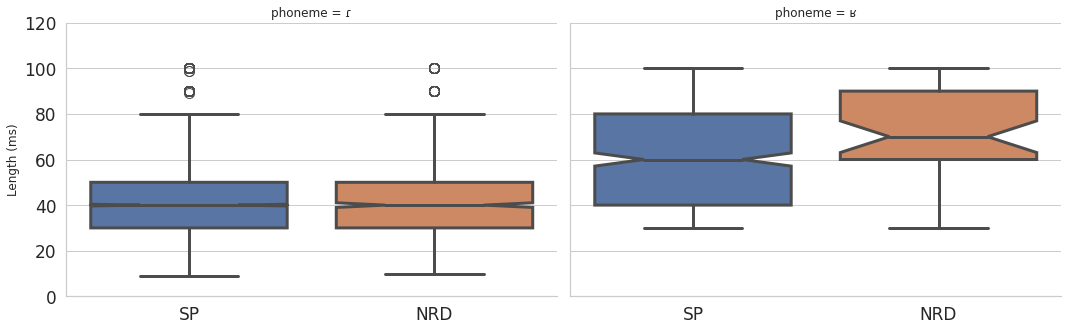

In [17]:
with sns.axes_style("whitegrid"):
    flierprops = dict(marker="o", markerfacecolor='None', markersize=10)
    fct = sns.catplot(
        data=rhotics_len_cut,
        y="length",
        x="state",
        kind="box",
        notch=True,
        col="phoneme",
        aspect=1.5,
        linewidth=3,
        flierprops=flierprops,
    )
    fct.set(ylim=(0, 120))
    fct.tight_layout()
    fct.set_axis_labels("", "Length (ms)")
    plt.savefig("../imgs/rhotics-len.pdf", dpi=300)

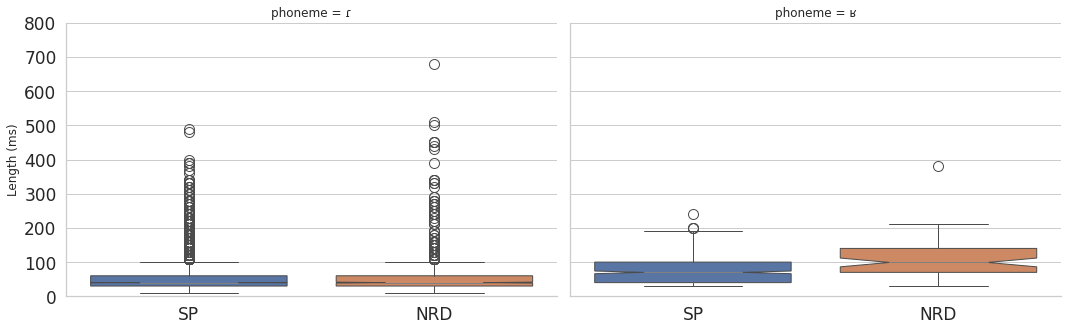

In [18]:
with sns.axes_style("whitegrid"):
    flierprops = dict()
    fct = sns.catplot(
        data=rhotics,
        y="length",
        x="state",
        kind="box",
        notch=True,
        col="phoneme",
        aspect=1.5,
        linewidth=1,
        flierprops={"marker": "o", "markerfacecolor": "None", "markersize": 10},
        medianprops={"color": "gray"},
    )
    fct.set(ylim=(0, 800))
    fct.tight_layout()
    fct.set_axis_labels("", "Length (ms)")
    plt.savefig("../imgs/rhotics-len.pdf", dpi=300)

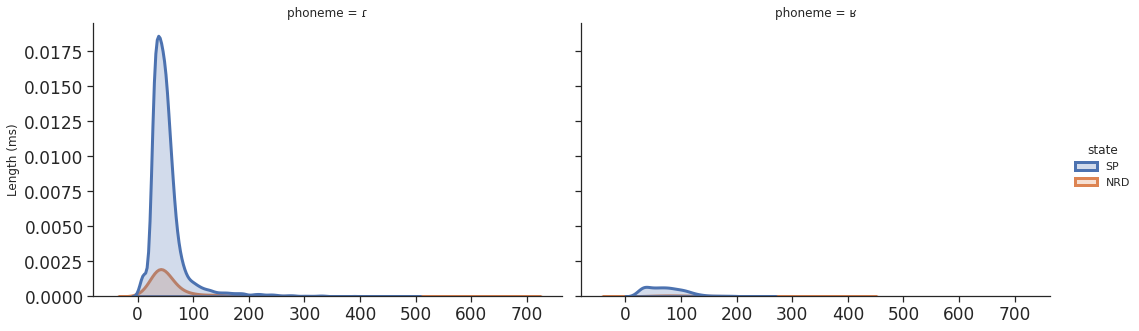

In [19]:
fct = sns.displot(
    data=rhotics,
    x="length",
    hue="state",
    kind="kde",
    col="phoneme",
    aspect=1.5,
    linewidth=3,
    fill=True,
)
# fct.set(ylim=(0, 800))
fct.tight_layout()
fct.set_axis_labels("", "Length (ms)")
plt.savefig("../imgs/rhotics-len-bf.pdf", dpi=300)

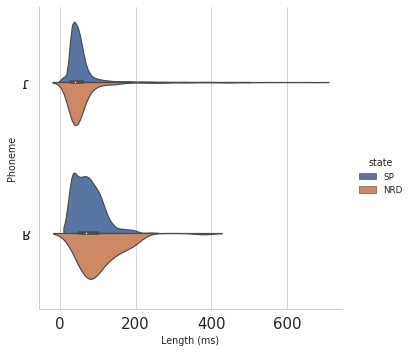

In [44]:
sns.set_theme(style="whitegrid", palette="deep", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)}, context="paper")
with sns.axes_style("whitegrid"):
    fct = sns.catplot(
        data=rhotics,
        y="phoneme",
        x="length",
        hue="state",
        kind="violin",
        split=True,
        medianprops={"color": "gray"},
    )
    fct.tight_layout()
    fct.set_axis_labels("Length (ms)", "Phoneme")
    plt.savefig("../imgs/rhotics-len.pdf", dpi=300)

In [90]:
sns.set_theme(style="whitegrid", palette="deep", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)}, context="paper")
f, axes = plt.subplots(1, 3, figsize=(20, 4), sharey=True, gridspec_kw={"wspace": 0.05})
feat_labels = {"length": "Length", "f4f3": r"$\Delta F_{43}$ (Hz)", "f5f4": r"$\Delta F_{54}$ (Hz)"}

for i, feat in enumerate(["length", "f4f3", "f5f4"]):
    g = sns.violinplot(
        data=rhotics,
        y="phoneme",
        x=feat,
        hue="state",
        kind="violin",
        split=True,
        medianprops={"color": "gray"},
        ax=axes[i],
        legend= leg,
    )
    g.set_xlabel(feat_labels[feat])
    
    if(feat == "length"):
        g.set_ylabel("Phoneme")
    else:
        g.set_ylabel("")
        
    if(feat != "f5f4"):
        g.get_legend().remove()
    else:
        plt.legend(title="Accent", bbox_to_anchor=(1.2, .7), frameon=False)

plt.savefig("../imgs/rhotics-feats-dist.pdf", bbox_inches='tight', dpi=300)

In [112]:
sns.set_theme(style="whitegrid", palette="deep", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)})
f, axes = plt.subplots(3, 1, figsize=(12, 12), sharey=True, gridspec_kw={"hspace": 0.3})
feat_labels = {"length": "Length", "f4f3": r"$\Delta F_{43}$ (Hz)", "f5f4": r"$\Delta F_{54}$ (Hz)"}

for i, feat in enumerate(["length", "f4f3", "f5f4"]):
    g = sns.violinplot(
        data=rhotics,
        y="phoneme",
        x=feat,
        hue="state",
        kind="violin",
        split=True,
        medianprops={"color": "gray"},
        ax=axes[i],
        legend= leg,
    )
    g.set_xlabel(feat_labels[feat])
    g.set_ylabel("Phoneme")
        
    if(feat != "f5f4"):
        g.get_legend().remove()
    else:
        plt.legend(title="Accent", bbox_to_anchor=(1.12, 2), frameon=False)

plt.savefig("../imgs/rhotics-feats-dist.pdf", bbox_inches='tight', dpi=300)

In [21]:
rhotics["length"][rhotics.length < 0].sum()

0

Now, there is a much better distribution and visualisation of the data. Note that the notches represent a confidence interval. Therefore, the /r/ has no significant difference, since both SP and NRD have their medians and notches intersecting each other. In contrast, /R/ medians are distant comparing the accents. For not reying simply on visualisation, a statistical test can define the differences more formally. Given the difference on the number of samples, and possible non-normal distribution, the Kruskall-Walllis test is better suited to evaluate statistical differences in our data.

In [22]:
print("Kruskall-Wallis test\n")

for rhotic in rhotics.phoneme.unique():
    rhotics_p = rhotics[(rhotics.phoneme == rhotic)]
    hstat, pval = stats.kruskal(
        rhotics_p[rhotics_p.state == "SP"]["length"].values,
        rhotics_p[rhotics_p.state == "NRD"]["length"].values,
    )
    
    if pval < 0.05:
        print(f"{rhotic} -- There are significant differences in the means!", end="")
    else:
        print(f"{rhotic} -- The means have no difference!", end="")
    print(f" p = {pval:1.4f}")

Kruskall-Wallis test

ɾ -- The means have no difference! p = 0.0682
ʁ -- There are significant differences in the means! p = 0.0000


As expected, /R/ has a statistical difference in comparison to *Paulistano*. Although this test does not rely on the number of samples, lets try to bootstrap the NRD (less data) to find its distributions with 95% confidence interval. 

In [23]:
(rhotics[rhotics.state == "NRD"]["length"].values,)

(array([ 30,  80, 160, ...,  30,  50,  50]),)

In [24]:
res = stats.bootstrap(
    data=(rhotics_len_cut[(rhotics_len_cut.state == "NRD") & (rhotics_len_cut.phoneme == "ʁ")]["length"].values,),
    statistic=np.median,
    n_resamples=1000,
    random_state=42,
    method="percentile",
)

interval, std = res.confidence_interval, res.standard_error
sp_median = rhotics_len_cut[(rhotics_len_cut.state == "SP") & (rhotics_len_cut.phoneme == "ʁ")]["length"].median()

if sp_median >= interval[0] and sp_median <= interval[1]:
    print("Median ʁ INSIDE", end="")
else:
    print("Median ʁ OUTSIDE", end="")
print(f" confidence interval: [{interval}] | {sp_median}")

Median ʁ OUTSIDE confidence interval: [ConfidenceInterval(low=70.0, high=90.0)] | 60.0


In [25]:
res = stats.bootstrap(
    data=(rhotics_len_cut[(rhotics_len_cut.state == "NRD") & (rhotics_len_cut.phoneme == "ɾ")]["length"].values,),
    statistic=np.median,
    n_resamples=1000,
    random_state=42,
    method="percentile",
)

interval, std = res.confidence_interval, res.standard_error
sp_median = rhotics_len_cut[(rhotics_len_cut.state == "SP") & (rhotics_len_cut.phoneme == "ɾ")]["length"].median()

if sp_median >= interval[0] and sp_median <= interval[1]:
    print("Median ɾ INSIDE", end="")
else:
    print("Median ɾ OUTSIDE", end="")
print(f" confidence interval: [{interval}] | {sp_median}")

Median ɾ INSIDE confidence interval: [ConfidenceInterval(low=40.0, high=40.0)] | 40.0


Using bootstraping and the 'percentile' method, the median length for SP of 60 falls outside the confidence interval of $[70, 90]$ for NRD. **That is, the /R/ has a longer duration in *Nordestino* accent!**

The other feature, the distance between higher formants, will evaluate tap sizes. The analysis applied to the length, can be used for the tapsmedian

In [26]:
rhotics.groupby(["state", "phoneme"]).describe()["f4f3"]

count         mean         std        min         25%  \
state phoneme                                                           
NRD   ɾ        1058.0   985.101169  488.776705   1.545410  640.643200   
      ʁ          73.0   981.968298  327.483847  59.792480  802.783940   
SP    ɾ        7293.0  1032.143476  419.452807   0.943359  759.562260   
      ʁ         574.0   991.557722  355.022377  10.147705  788.432063   

                      50%        75%        max  
state phoneme                                    
NRD   ɾ         970.16420  1247.0342  3156.5483  
      ʁ        1007.33840  1206.7974  1696.7280  
SP    ɾ        1024.18500  1289.4573  3466.8506  
      ʁ         969.43773  1158.7587  2710.3510

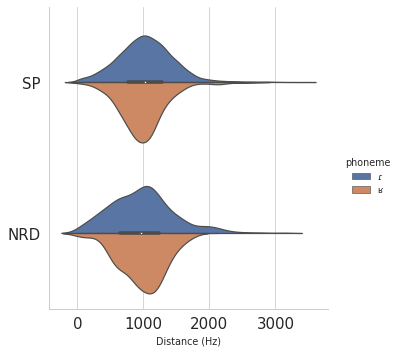

In [41]:
sns.set_theme(style="whitegrid", palette="deep", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)}, context="paper")
with sns.axes_style("whitegrid"):
    fct = sns.catplot(
        data=rhotics,
        y="state",
        x="f4f3",
        kind="violin",
        hue="phoneme",
        split=True,
        medianprops={"color": "gray"},
    )
    fct.tight_layout()
    fct.set_axis_labels("Distance (Hz)", "")
    plt.savefig("../imgs/rhotics-f4f3.pdf", dpi=300)

Both mean and standard deviations looks fine, lets plot the data and take a better look at them.

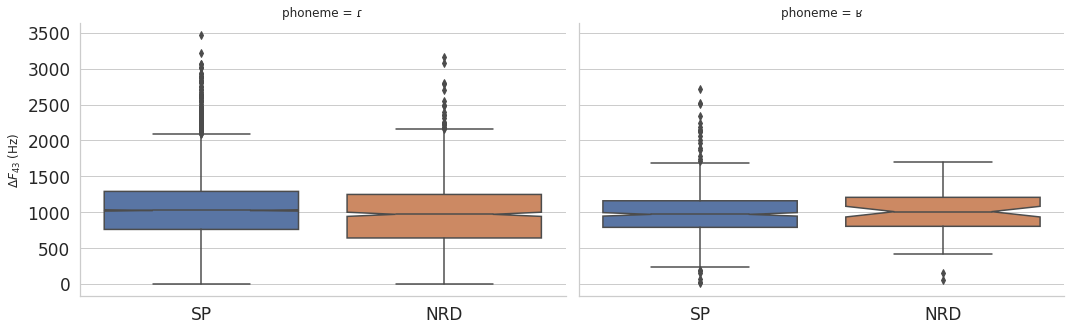

In [28]:
with sns.axes_style("whitegrid"):
    fct = sns.catplot(
        data=rhotics,
        y="f4f3",
        x="state",
        kind="box",
        notch=True,
        col="phoneme",
        aspect=1.5,
    )
    fct.tight_layout()
    fct.set_axis_labels("", r"$\Delta F_{43}$ (Hz)")
    # plt.savefig("../imgs/rhotics-len.pdf", dpi=300)

The medians and quartils look very similar, although /r/ median seem to be off the confidence interval of NRD it is difficult to see that in the figure. Therefore,  a statistical test can confirm that

In [29]:
print("Kruskall-Wallis test\n")

for rhotic in rhotics.phoneme.unique():
    rhotics_p = rhotics[(rhotics.phoneme == rhotic)]
    hstat, pval = stats.kruskal(
        rhotics_p[rhotics_p.state == "SP"]["f4f3"].values,
        rhotics_p[rhotics_p.state == "NRD"]["f4f3"].values,
    )
    
    if pval < 0.05:
        print(f"{rhotic} -- There are significant differences in the distributions!", end="")
    else:
        print(f"{rhotic} -- The distributions have no difference!", end="")
    print(f" p = {pval:1.4f}")

Kruskall-Wallis test

ɾ -- There are significant differences in the means! p = 0.0000
ʁ -- The means have no difference! p = 0.6417


Lets make another bootstrap, for peace-of-mind.

In [30]:
res = stats.bootstrap(
    data=(rhotics[(rhotics.state == "NRD") & (rhotics.phoneme == "ʁ")]["f4f3"].values,),
    statistic=np.median,
    n_resamples=1000,
    random_state=42,
    method="percentile",
)

print(res)
print(rhotics[(rhotics.state == "SP") & (rhotics.phoneme == "ʁ")]["f4f3"].median())

BootstrapResult(confidence_interval=ConfidenceInterval(low=902.11743, high=1089.6873), standard_error=57.98057096214367)
969.43773


In [31]:
res = stats.bootstrap(
    data=(rhotics[(rhotics.state == "NRD") & (rhotics.phoneme == "ɾ")]["f4f3"].values,),
    statistic=np.median,
    n_resamples=1000,
    random_state=42,
    method="percentile",
)

print(res)
print(rhotics[(rhotics.state == "SP") & (rhotics.phoneme == "ɾ")]["f4f3"].median())

BootstrapResult(confidence_interval=ConfidenceInterval(low=938.600095, high=1009.1964307500001), standard_error=17.650973115095546)
1024.185


Now, although the Kruskall-Wallis test has found signifficant differences between *Nordestino* and *Paulistano* /ɾ/ the *Paulistano* median distance is inside the confidence interval found by bootstraping.

E AI????!!!!

Lets check how the other distance is distributed, the difference between **F5** and **F4**.

In [27]:
rhotics.groupby(["state", "phoneme"]).describe()["f5f4"]

count         mean         std        min         25%  \
state phoneme                                                           
NRD   ɾ        1058.0  1137.340482  532.286601  14.607422  770.124812   
      ʁ          73.0  1015.754358  365.800229  92.579100  810.839840   
SP    ɾ        7293.0  1028.598186  472.598141   2.882324  723.785160   
      ʁ         574.0  1019.839736  430.031251  39.037840  761.893000   

                      50%         75%        max  
state phoneme                                     
NRD   ɾ        1068.09830  1449.99550  3554.9272  
      ʁ         985.11960  1184.15060  2098.3330  
SP    ɾ         980.34130  1257.68970  3935.2498  
      ʁ         952.68932  1211.73905  3027.1790

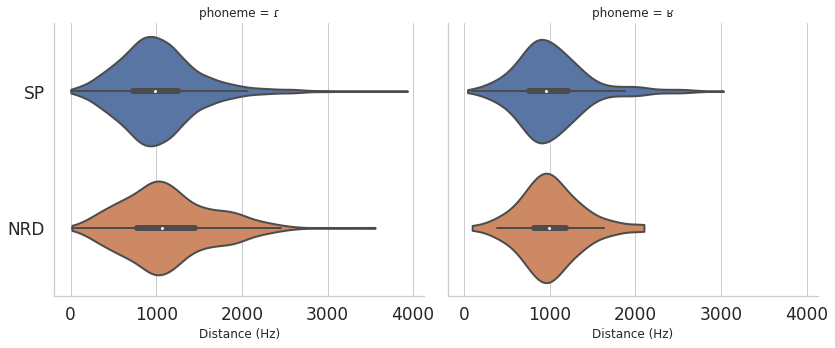

In [161]:
with sns.axes_style("whitegrid"):
    fct = sns.catplot(
        data=rhotics,
        y="state",
        x="f5f4",
        kind="violin",
        col="phoneme",
        aspect=1.2,
        linewidth=2,
        medianprops={"color": "gray"},
        cut=0,
    )
    # fct.set(xlim=(-100, 800))
    fct.tight_layout()
    fct.set_axis_labels("Distance (Hz)", "")
    plt.savefig("../imgs/rhotics-f5f4.pdf", dpi=300)

Both mean and standard deviations looks fine, lets plot the data and take a better look at them.

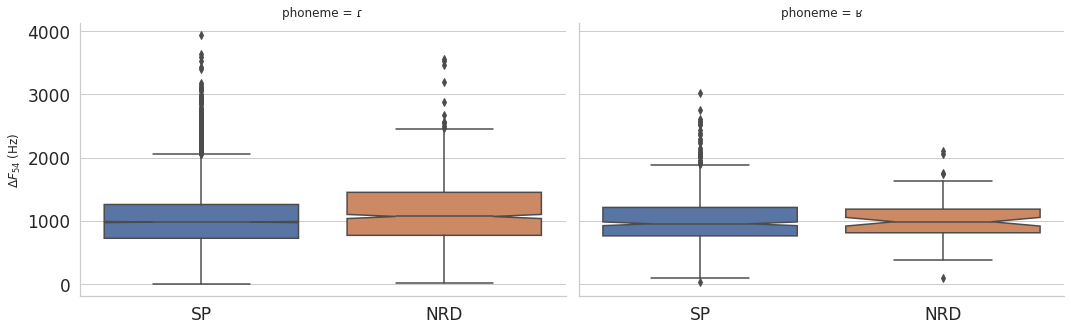

In [39]:
with sns.axes_style("whitegrid"):
    fct = sns.catplot(
        data=rhotics,
        y="f5f4",
        x="state",
        kind="box",
        notch=True,
        col="phoneme",
        aspect=1.5,
    )
    fct.tight_layout()
    fct.set_axis_labels("", r"$\Delta F_{54}$ (Hz)")
    # plt.savefig("../imgs/rhotics-len.pdf", dpi=300)

The medians and quartils look very similar, although /r/ median seem to be off the confidence interval of NRD it is difficult to see that in the figure. Therefore,  a statistical test can confirm that

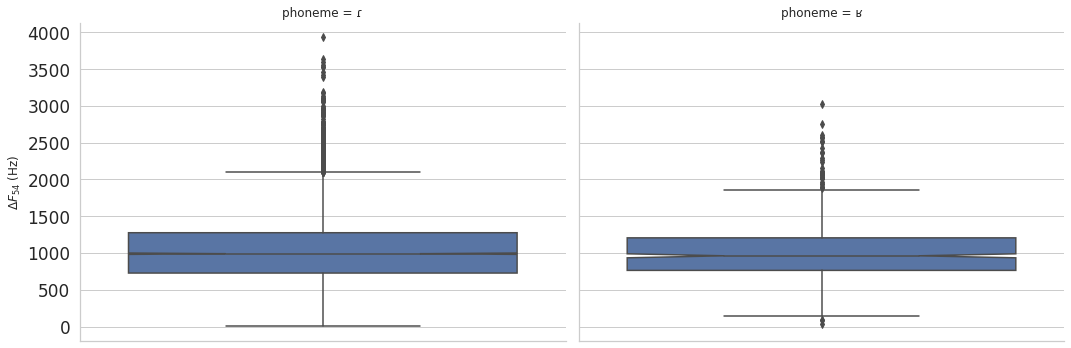

In [40]:
with sns.axes_style("whitegrid"):
    fct = sns.catplot(
        data=rhotics,
        y="f5f4",
        # x="state",
        kind="box",
        notch=True,
        col="phoneme",
        aspect=1.5,
    )
    fct.tight_layout()
    fct.set_axis_labels("", r"$\Delta F_{54}$ (Hz)")
    # plt.savefig("../imgs/rhotics-len.pdf", dpi=300)

In [41]:
rhotics_f54 = rhotics[rhotics.f5f4 <= 2300]
print(f"Found {len(rhotics[rhotics.f5f4 > 2050].index)} outliers")

Found 328 outliers


In [42]:
print("Kruskall-Wallis test\n")

for rhotic in rhotics.phoneme.unique():
    rhotics_p = rhotics[(rhotics.phoneme == rhotic)]
    hstat, pval = stats.kruskal(
        rhotics_p[rhotics_p.state == "SP"]["f5f4"].values,
        rhotics_p[rhotics_p.state == "NRD"]["f5f4"].values,
    )
    
    if pval < 0.05:
        print(f"{rhotic} -- There are significant differences in the means!", end="")
    else:
        print(f"{rhotic} -- The means have no difference!", end="")
    print(f" p = {pval:1.4f}")

Kruskall-Wallis test

ɾ -- There are significant differences in the means! p = 0.0000
ʁ -- The means have no difference! p = 0.6298


Lets make another bootstrap, for peace-of-mind.

In [43]:
res = stats.bootstrap(
    data=(rhotics[(rhotics.state == "NRD") & (rhotics.phoneme == "ʁ")]["f5f4"].values,),
    statistic=np.median,
    n_resamples=1000,
    random_state=42,
    method="percentile",
)

print(res)
print(rhotics[(rhotics.state == "SP") & (rhotics.phoneme == "ʁ")]["f5f4"].median())

BootstrapResult(confidence_interval=ConfidenceInterval(low=930.48096, high=1068.1221), standard_error=35.653450661642275)
952.68932


In [44]:
res = stats.bootstrap(
    data=(rhotics[(rhotics.state == "NRD") & (rhotics.phoneme == "ɾ")]["f5f4"].values,),
    statistic=np.median,
    n_resamples=1000,
    random_state=42,
    method="percentile",
)

print(res)
print(rhotics[(rhotics.state == "SP") & (rhotics.phoneme == "ɾ")]["f5f4"].median())

BootstrapResult(confidence_interval=ConfidenceInterval(low=1032.7690499999999, high=1104.6439), standard_error=17.660223711825697)
980.3413


And here the statistical tests are also confirmed with the Bootstraping. **The /ɾ/ in nordestino has larger distance between formants 5 and 4!**